In [24]:
import numpy as np
import pandas  as pd

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D 

In [26]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [27]:
train['label'].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

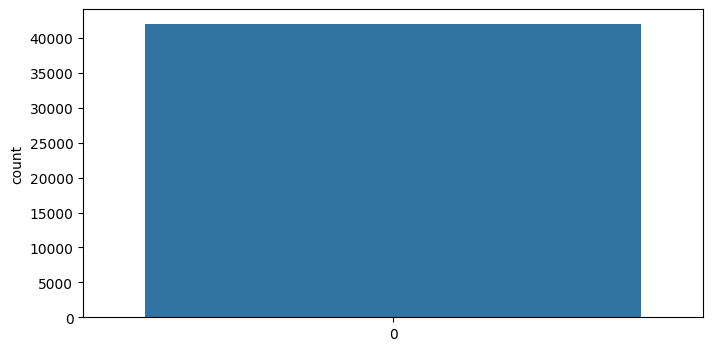

In [28]:
plt.figure(figsize=(8,4))
sns.countplot(train['label'])
plt.show()

In [29]:
x_train = train.drop(labels = ['label'], axis = 1)
x_train.head(1)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y_train = train['label']
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

Data Processing

In [31]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_train = x_train / 255.0

In [32]:
y_train = to_categorical(y_train, num_classes=10)

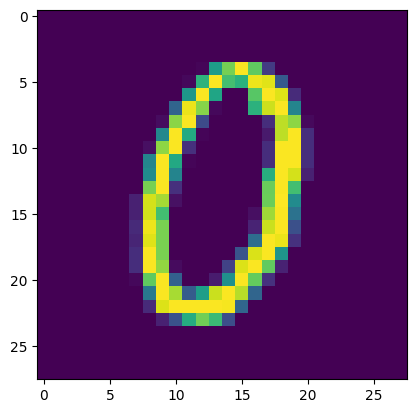

In [33]:
plt.imshow(x_train[5][:,:,0])
plt.show()

In [34]:
y_train[5]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Model Building

In [35]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten()) # convert to 1d array
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(lr=0.01)

C:\Python310\lib\site-packages\keras\optimizers\legacy\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [40]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        36928     
                                                      

In [41]:
epochs=20
batch_size=64
model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size)

Epoch 1/20
657/657 [==============================] - 245s 371ms/step - loss: 0.2836 - accuracy: 0.9081
Epoch 2/20
657/657 [==============================] - 255s 389ms/step - loss: 0.0967 - accuracy: 0.9710
Epoch 3/20
657/657 [==============================] - 221s 336ms/step - loss: 0.0753 - accuracy: 0.9773
Epoch 4/20
657/657 [==============================] - 224s 341ms/step - loss: 0.0633 - accuracy: 0.9803
Epoch 5/20
657/657 [==============================] - 228s 346ms/step - loss: 0.0549 - accuracy: 0.9838
Epoch 6/20
657/657 [==============================] - 224s 340ms/step - loss: 0.0540 - accuracy: 0.9835
Epoch 7/20
657/657 [==============================] - 225s 342ms/step - loss: 0.0434 - accuracy: 0.9860
Epoch 8/20
657/657 [==============================] - 225s 343ms/step - loss: 0.0441 - accuracy: 0.9860
Epoch 9/20
657/657 [==============================] - 216s 328ms/step - loss: 0.0409 - accuracy: 0.9868
Epoch 10/20
657/657 [==============================] - 223s 339m

In [42]:
x_test = test.values.reshape(-1, 28, 28, 1)
x_test = x_test / 255.0

875/875 [==============================] - 46s 52ms/step


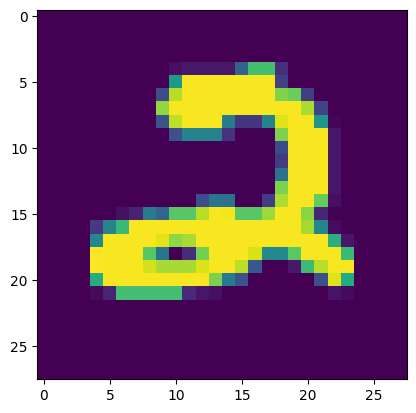

In [43]:
y_test=model.predict(x_test)
plt.imshow(x_test[0][:,:,0])
plt.show()

In [44]:
y_test[0]

array([1.1945902e-11, 4.7660583e-15, 1.0000000e+00, 4.3074616e-10,
       2.1070572e-12, 2.6518064e-18, 3.5374606e-14, 6.2709243e-12,
       5.5027454e-09, 2.7338104e-13], dtype=float32)

In [45]:
y_test=[np.argmax(y_test1) for y_test1 in y_test]
y_test[0]

2

In [46]:
submission = pd.DataFrame({'ImageId' : [i+1 for i in range(len(y_test))] , 'Label' : y_test})
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [47]:
submission.to_csv('submission.csv', index =False)

In [48]:
import pickle

In [50]:
pickle.dump(model, open('./model.p', 'wb'))